In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append("..")
from data.utils import distinct_colors
from models.datasets import PartNetDataset

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [60]:
with h5py.File("/space/ariyanzarei/sorghum_segmentation/dataset/PartNetData/raw_data/ins_seg/ins_seg_h5/Bed/train-00.h5") as f:
    print(f.keys())
    print(f['pts'].shape)
    print(f['label'].shape)

with h5py.File("/space/ariyanzarei/sorghum_segmentation/dataset/PartNetData/raw_data/ins_seg/ins_seg_h5/Bed/val-00.h5") as f:
    print(f.keys())
    print(f['pts'].shape)
    print(f['label'].shape)

with h5py.File("/space/ariyanzarei/sorghum_segmentation/dataset/PartNetData/raw_data/ins_seg/ins_seg_h5/Bed/test-00.h5") as f:
    print(f.keys())
    print(f['pts'].shape)
    print(f['label'].shape)


<KeysViewHDF5 ['label', 'nor', 'opacity', 'pts', 'rgb']>
(133, 10000, 3)
(133, 10000)
<KeysViewHDF5 ['label', 'nor', 'opacity', 'pts', 'rgb']>
(24, 10000, 3)
(24, 10000)
<KeysViewHDF5 ['label', 'nor', 'opacity', 'pts', 'rgb']>
(37, 10000, 3)
(37, 10000)


In [9]:
dataset = PartNetDataset("/space/ariyanzarei/sorghum_segmentation/dataset/PartNetData/raw_data/ins_seg/ins_seg_h5", "Bed", "train")
points, labels = dataset[0:10]
points = points.numpy()
labels = labels.numpy()
print(points.shape)
print(labels.shape)

(10, 10000, 3)
(10, 10000)


In [58]:
with h5py.File("/space/ariyanzarei/sorghum_segmentation/dataset/PartNetData/raw_data/ins_seg/ins_seg_h5/Chair/train-00.h5") as f:
    print(f.keys())
    points = np.array(f['pts'])
    labels = np.array(f['label'])
    print(points.shape)
    print(labels.shape)
    

<KeysViewHDF5 ['label', 'nor', 'opacity', 'pts', 'rgb']>
(1024, 10000, 3)
(1024, 10000)


(10000, 4)
5 171


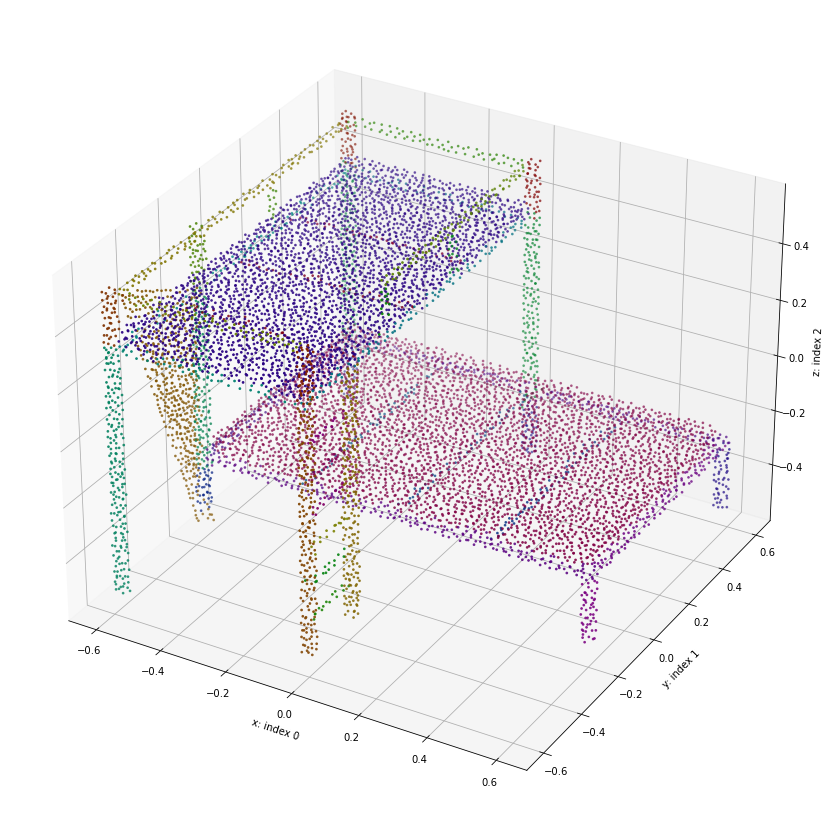

In [10]:
ind = 1
p = points[ind]
label = labels[ind]

rotation_matrix = np.eye(4)
rotation_matrix[1,1] = 0
rotation_matrix[1,2] = 1
rotation_matrix[2,1] = -1
rotation_matrix[2,2] = 0

new_p = np.matmul(np.hstack((p, np.ones((p.shape[0],1)))), rotation_matrix)
print(new_p.shape)
p = new_p
print(min(label), max(label))

d_colors = distinct_colors(len(list(set(label))))
colors = np.zeros((label.shape[0],3))
for i, l in enumerate(list(set(label))):
    colors[label == l, :] = d_colors[i]
    
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(p[:,0],p[:,1],p[:,2], s=3, c=colors)
ax.set_xlabel("x: index 0")
ax.set_ylabel("y: index 1")
ax.set_zlabel("z: index 2")
plt.show()